In [1]:
import cv2
import pytesseract
import numpy as np

In [2]:
# Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\tmorton\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [3]:
# number of imgs
num_bills = 2

# relative pos of serial num 
x = 0.618  # horizontal 
y = 0.28 # vertical 
w = 0.219  # width 
h = 0.08  # height 

'''
top-left: 808, 162
rectangle ctr: 924, 179
rectangle size: 262; 40
image: 1280 x 558
'''

'\ntop-left: 808, 162\nrectangle ctr: 924, 179\nrectangle size: 262; 40\nimage: 1280 x 558\n'

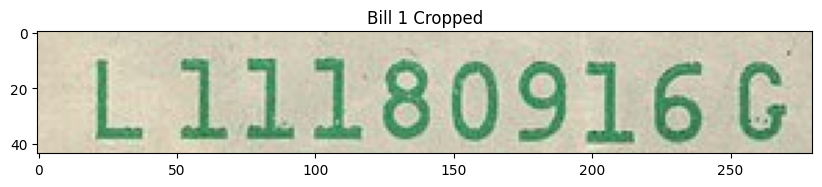

Bill 1: L111809166G



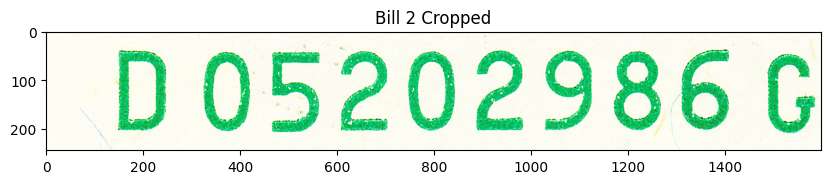

Bill 2: D05202986G



In [4]:
import matplotlib.pyplot as plt

for i in range(1, num_bills+1):
    # load img
    img = cv2.imread(f'input/bill{i}.jpg')
    assert img is not None, "file could not be read, check path"

    # relative pos to absolute pos based on img size
    height, width = img.shape[:2]
    x_abs = int(x * width)
    y_abs = int(y * height)
    w_abs = int(w * width)
    h_abs = int(h * height)

    # crop
    img_cropped = img[y_abs:y_abs+h_abs, x_abs:x_abs+w_abs]

 
    # display crop for testing
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))
    plt.title(f'Bill {i} Cropped')
    plt.show()

    # to grey
    img_gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)

    # add gaussian blur
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # rescale
    img_rescaled = cv2.resize(img_blur, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # binarize
    _, img_bin = cv2.threshold(img_rescaled, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # extract text
    config = '--oem 3 --psm 7'
    text = pytesseract.image_to_string(img_bin, config=config)
    print(f'Bill {i}: {text}')